In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg 

In [16]:
df=pd.read_csv("tesla_adjusted.csv",index_col=0,parse_dates=True)
df.drop(columns=['change_percent','avg_vol_20d'],inplace=True)
df

,open,high,low,close,volume,raw_close
date,,,,,,
2010-06-29,1.26666,1.66666,1.16934,1.59266,281749173,23.8899
2010-06-30,1.71934,2.02794,1.55334,1.58866,257915884,23.8299
2010-07-01,1.66666,1.72800,1.35134,1.46400,123447940,21.9600
2010-07-02,1.53334,1.54000,1.24734,1.28000,77127102,19.2000
2010-07-06,1.33334,1.33334,1.05534,1.07400,103189435,16.1100
...,...,...,...,...,...,...
2023-09-25,243.38000,247.10000,238.31000,246.99000,104636602,246.9900
2023-09-26,242.98000,249.55000,241.66010,244.12000,101993602,244.1200
2023-09-27,244.26200,245.33000,234.58000,240.50000,136597203,240.5000


<Axes: xlabel='date'>

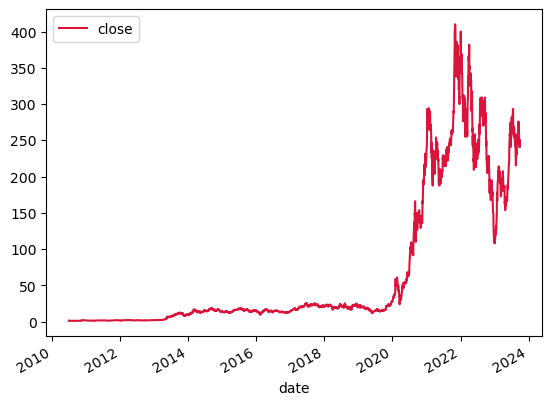

In [36]:
data=df[['close']]
data.plot(color='crimson')

In [18]:
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(data,autolag='AIC')
print("ADF  :",dftest[0])
print("P Value  :",dftest[1])
print("Lags  :",dftest[2])
print("Number of observations used for ADF Regression and Critical Value Calculation  :",dftest[3])
for key,value in dftest[4].items():
    print(key  ,":", value)

ADF  : -0.8312513485306174
P Value  : 0.8097694478645588
Lags  : 29
Number of observations used for ADF Regression and Critical Value Calculation  : 3307
1% : -3.432328948643146
5% : -2.862414382816965
10% : -2.567235451893058


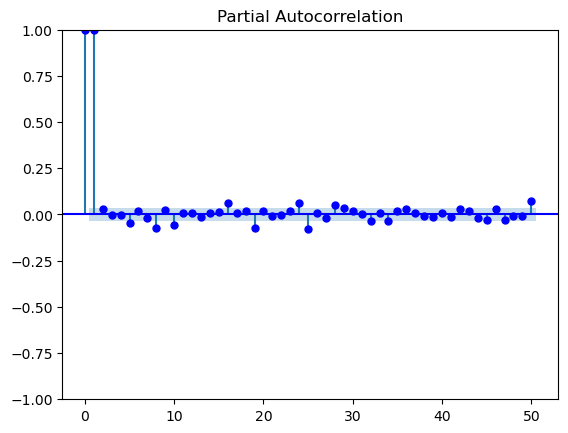

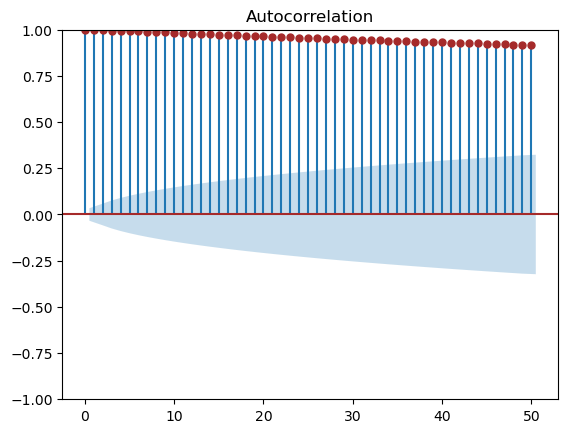

In [37]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
pacf=plot_pacf(data,lags=50, color='blue')
acf=plot_acf(data,lags=50, color='brown')

In [21]:
train=data[:len(data)-7]
test=data[len(data)-7:]

In [22]:
model=AutoReg(train,lags=2).fit()

C:\Users\San\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [23]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  close   No. Observations:                 3330
Model:                     AutoReg(2)   Log Likelihood               -9808.683
Method:               Conditional MLE   S.D. of innovations              4.611
Date:                Tue, 20 Feb 2024   AIC                          19625.365
Time:                        20:40:47   BIC                          19649.806
Sample:                             2   HQIC                         19634.110
                                 3330                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1148      0.096      1.192      0.233      -0.074       0.304
close.L1       0.9613      0.017     55.492      0.000       0.927       0.995
close.L2       0.0382      0.017      2.203      0.0

In [24]:
pred=model.predict(start=len(train),end=len(data)-1,dynamic=False)

C:\Users\San\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\San\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\San\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


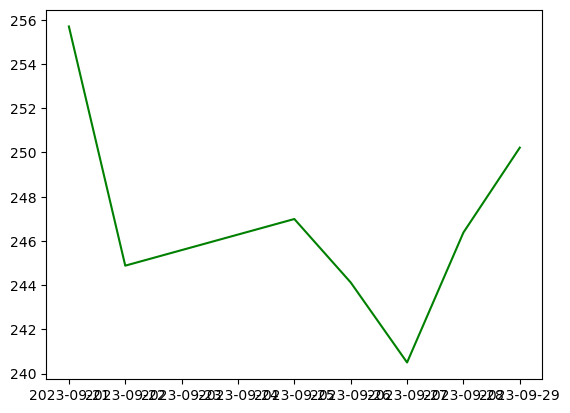

In [26]:
pyplot.plot(test,color='green')

3330    262.723299
3331    262.702153
3332    262.686915
3333    262.671459
3334    262.656018
3335    262.640585
3336    262.625159
dtype: float64


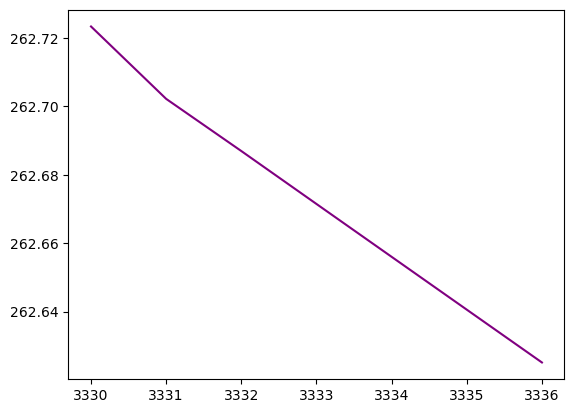

In [28]:
pyplot.plot(pred,color='purple')

print(pred)